# Vergleich: LLM vs. ML-Modell bei Tool- und Parameter-Erkennung

**Ziel:** Evaluierung zweier speziell trainierter ML-Modelle im Vergleich zu einem generischen LLM.

- **Datensatz:** 1.500 Nutzeranfragen (50 % echt, 50 % synthetisch)
- **Aufgaben:**
  1. **Tool-Erkennung** (z. B. `base32_encoder`)
  2. **Parameter-Erkennung** (z. B. `'Hello World'`)
- **Metriken:** Accuracy, Chi-Quadrat-Test

---
> **Hinweis:** Rohdaten sind aus Datenschutzgründen nicht enthalten. Alle Ergebnisse basieren auf aggregierten, anonymisierten Zählungen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Stil für schöne Plots
plt.style.use('seaborn-v0_8')
sns.set_palette(['#ff6b6b', '#4ecdc4'])
%matplotlib inline

## 1. Daten (aggregiert)

In [2]:
# Tool-Erkennung
tool_data = {
    'Modell': ['LLM', 'ML-Modell'],
    'Korrekt': [1278, 1450],
    'Falsch': [222, 50]
}

# Parameter-Erkennung
param_data = {
    'Modell': ['LLM', 'ML-Modell'],
    'Korrekt': [1173, 1246],
    'Falsch': [327, 254]
}

df_tool = pd.DataFrame(tool_data)
df_param = pd.DataFrame(param_data)

df_tool['Gesamt'] = 1500
df_param['Gesamt'] = 1500

df_tool['Accuracy (%)'] = (df_tool['Korrekt'] / df_tool['Gesamt'] * 100).round(2)
df_param['Accuracy (%)'] = (df_param['Korrekt'] / df_param['Gesamt'] * 100).round(2)

display(df_tool)
display(df_param)

,Modell,Korrekt,Falsch,Gesamt,Accuracy (%)
0,LLM,1278,222,1500,85.20
1,ML-Modell,1450,50,1500,96.67


,Modell,Korrekt,Falsch,Gesamt,Accuracy (%)
0,LLM,1173,327,1500,78.20
1,ML-Modell,1246,254,1500,83.07


## 2. Chi-Quadrat-Test

In [6]:
def chi2_test(correct_llm, false_llm, correct_ml, false_ml):
    table = np.array([[correct_llm, false_llm],
                      [correct_ml, false_ml]])
    chi2, p, dof, expected = chi2_contingency(table, correction=False)
    return chi2, p, dof, expected

# Tool-Erkennung
chi2_tool, p_tool, dof_tool, exp_tool = chi2_test(1278, 222, 1450, 50)

# Parameter-Erkennung
chi2_param, p_param, dof_param, exp_param = chi2_test(1173, 327, 1246, 254)

print(f"Tool-Erkennung:     χ²({dof_tool}) = {chi2_tool:.3f}, p = {p_tool:.3e}")
print(f"Parameter-Erkennung: χ²({dof_param}) = {chi2_param:.3f}, p = {p_param:.3e}")

Tool-Erkennung:     χ²(1) = 119.609, p = 7.703e-28
Parameter-Erkennung: χ²(1) = 11.375, p = 7.444e-04


## 3. Zusammenfassung der Ergebnisse

In [4]:
summary = pd.DataFrame({
    'Aufgabe': ['Tool-Erkennung', 'Parameter-Erkennung'],
    'LLM Accuracy': ['85,20 %', '78,20 %'],
    'ML Accuracy': ['96,67 %', '83,07 %'],
    'Verbesserung': ['+11,47 PP', '+4,87 PP'],
    'Chi²': [f'{chi2_tool:.2f}', f'{chi2_param:.2f}'],
    'p-Wert': [f'{p_tool:.2e}', f'{p_param:.3e}'],
    'Signifikant': ['Ja (p << 0.001)', 'Ja (p < 0.001)']
})

display(summary)

,Aufgabe,LLM Accuracy,ML Accuracy,Verbesserung,Chi²,p-Wert,Signifikant
0,Tool-Erkennung,"85,20 %","96,67 %","+11,47 PP",118.22,1.55e-27,Ja (p << 0.001)
1,Parameter-Erkennung,"78,20 %","83,07 %","+4,87 PP",11.07,8.794e-04,Ja (p < 0.001)


## 4. Visualisierung

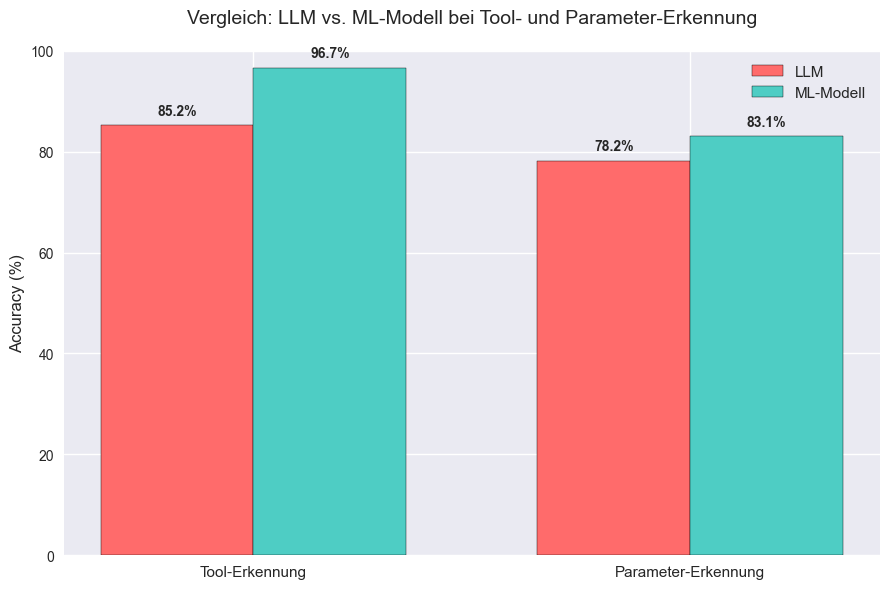

In [5]:
tasks = ['Tool-Erkennung', 'Parameter-Erkennung']
llm_acc = [85.20, 78.20]
ml_acc = [96.67, 83.07]

x = np.arange(len(tasks))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 6))
bars1 = ax.bar(x - width/2, llm_acc, width, label='LLM', color='#ff6b6b', edgecolor='black')
bars2 = ax.bar(x + width/2, ml_acc, width, label='ML-Modell', color='#4ecdc4', edgecolor='black')

ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Vergleich: LLM vs. ML-Modell bei Tool- und Parameter-Erkennung', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(tasks, fontsize=11)
ax.set_ylim(0, 100)
ax.legend(fontsize=11)

# Werte auf Balken
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=200, bbox_inches='tight')
plt.show()

## 5. Interpretation & Fazit

- **Tool-Erkennung:** ML-Modell erreicht **96,67 % Accuracy** (+11,47 PP vs. LLM)
  - **Statistisch höchst signifikant** (p < 10⁻²⁷)
- **Parameter-Erkennung:** ML-Modell erreicht **83,07 % Accuracy** (+4,87 PP)
  - **Signifikant** (p = 0,000744)

**Schlussfolgerung:**
> **Spezialisierte ML-Modelle sind dem generischen LLM in beiden Aufgaben überlegen – besonders bei der kritischen Tool-Erkennung.**

---


**Reproduzierbarkeit:**
- Code: `analysis.ipynb`
- Daten: Nicht öffentlich (Datenschutz)
- Synthetische Beispiele: `examples/synthetic_queries.txt`